In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# providing the dataset path
data1 = "C:/Users/Nael/Desktop/Uganda/Uganda Uthabiti_baseline/ML/baseline_dataset.csv"
# reading the csv file and named as df
df = pd.read_csv(data1, encoding='latin-1')    

In [3]:
# checking  and # getting all the column names of the dataframe
columns_names = list(df.columns)
#print(columns_names)    # for printing the column name, remove # from this code line      

In [4]:
df.shape

(824, 207)

# I. Variables/columns creation 


##  1) Household size 

In [5]:
df["hh_size"] = df['m total'] + df['f total']

 ## 2)  Gendered household type

In [6]:
# Creation of a new separate column calculating number of male adults, female adulte and children in the household 
df['num_male_adult'] = df['m 18-29 years'] + df['m 30-59 years'] + df['m 60 years and above'] 
df['num_female_adult'] = df['f 18-29 years'] + df['f 30-59 years'] + df['f 60 years and above']
df['num_children'] = df['m 0-17 years'] + df['f 0-17 years']

In [7]:
# creation of a new  "boolean"  column for each gendered household type 
df['FM_gender'] = df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] >= 1) else 0, axis=1)
df['FNM_gender'] =df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] >= 1) else 0, axis=1)
df['MNF_gender'] = df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] == 0) else 0, axis=1)
df['CNA_gender'] = df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] == 0) else 0, axis=1)

In [8]:
#  Calculation of percentage of Female & Male adult households
count_FM = df['FM_gender'].value_counts()[1]
print( "% of F&M is :", round((count_FM/df.shape[0]) *100),"%")

% of F&M is : 67 %


In [9]:
# Calcualation of Percentage of Female No Male adult households
count_FNM = df['FNM_gender'].value_counts()[1]
print( "% of FNM is :", round((count_FNM/df.shape[0]) *100), "%")

% of FNM is : 20 %


In [10]:
# Calculation of percentage of Male No Female adult households
count_MNF = df['MNF_gender'].value_counts()[1]
print( "% of MNF is :", round((count_MNF/df.shape[0]) *100), "%")

% of MNF is : 7 %


In [11]:
# Calculation of Percentage of Children No adult households
count_CNA = df['CNA_gender'].value_counts()[1]
print( "% of CNA is :", round((count_CNA/df.shape[0]) *100), "%")

% of CNA is : 6 %


In [12]:
# Creation of single column for gendered household type 
df['gender_HH_type'] = np.where((df['FM_gender'] == 1) & (df['FNM_gender'] == 0) & (df['MNF_gender'] == 0) & (df['CNA_gender'] == 0), 'F&M',
                   np.where((df['FM_gender'] == 0) & (df['FNM_gender'] == 1) & (df['MNF_gender'] ==0) & (df['CNA_gender'] == 0), 'FNM',
                   np.where((df['FM_gender'] == 0) & (df['FNM_gender'] == 0) & (df['MNF_gender'] == 1) & (df['CNA_gender'] == 0), 'MNF', 'CNA')))

In [13]:
# Count of gendered household type
gender = df['gender_HH_type'].value_counts()
gender

F&M    548
FNM    167
MNF     60
CNA     49
Name: gender_HH_type, dtype: int64

## 3) Food Consumption Score

In [14]:
# checking the data type for Food group consumption columns 
df[['FC01','FC02','FC03','FC04','FC05','FC06','FC07','FC08','FC09']].dtypes

FC01    object
FC02    object
FC03    object
FC04    object
FC05    object
FC06    object
FC07    object
FC08    object
FC09    object
dtype: object

In [15]:
# checking the number of missing value for food group consumption columns 
FC_missing = df[['FC01','FC02','FC03','FC04','FC05','FC06','FC07','FC08','FC09']].isna().sum()
print (FC_missing)

FC01    0
FC02    0
FC03    0
FC04    0
FC05    0
FC06    0
FC07    0
FC08    0
FC09    0
dtype: int64


In [16]:
# viewing  the different values in FCO1 and so on
print (df['FC01'].unique())
print (df['FC02'].unique())

['2 days' '7 days' '3 days' '4 days' '1 day' '6 days' '5 days' '0 day']
['3 days' '6 days' '0 day' '7 days' '5 days' '4 days' '2 days' '1 day']


In [17]:
# creating/renaming food group consumption column and keeping the first value characters (ex: 2 days to 2)
df['FC01_staple'] = df['FC01'].str.slice(stop=1)
df['FC02_Pulse']  = df['FC02'].str.slice(stop=1)
df['FC03_Vegetable'] = df['FC03'].str.slice(stop=1)
df['FC04_Fruits'] = df['FC04'].str.slice(stop=1)
df['FC05_Meat_Fish'] = df['FC05'].str.slice(stop=1)
df['FC06_Milk'] = df['FC06'].str.slice(stop=1)
df['FC07_Sugar'] = df['FC07'].str.slice(stop=1)
df['FC08_Oil'] = df['FC08'].str.slice(stop=1)
df['FC09_Condiment'] = df['FC09'].str.slice(stop=1)

In [18]:
# Transforming columns as integer data type
df['FC01_staple'] = pd.to_numeric(df['FC01_staple'], errors='coerce').astype(int)
df['FC02_Pulse'] = pd.to_numeric(df['FC02_Pulse'], errors='coerce').astype(int)
df['FC03_Vegetable'] = pd.to_numeric(df['FC03_Vegetable'], errors='coerce').astype(int)
df['FC04_Fruits'] = pd.to_numeric(df['FC04_Fruits'], errors='coerce').astype(int)
df['FC05_Meat_Fish'] = pd.to_numeric(df['FC05_Meat_Fish'], errors='coerce').astype(int)
df['FC06_Milk'] = pd.to_numeric(df['FC06_Milk'], errors='coerce').astype(int)
df['FC07_Sugar'] = pd.to_numeric(df['FC07_Sugar'], errors='coerce').astype(int)
df['FC08_Oil'] = pd.to_numeric(df['FC08_Oil'], errors='coerce').astype(int)
df['FC09_Condiment'] = pd.to_numeric(df['FC09_Condiment'], errors='coerce').astype(int)

In [19]:
# Creating food group weighted colums
df['FC01_staple_W'] = df['FC01_staple']*2
df['FC02_Pulse_W']  = df['FC02_Pulse']*3
df['FC03_Vegetable_1'] = df['FC03_Vegetable']*1
df['FC04_Fruits_W'] = df['FC04_Fruits']*1
df['FC05_Meat_Fish_W'] = df['FC05_Meat_Fish']*4
df['FC06_Milk_W'] = df['FC06_Milk']*4
df['FC07_Sugar_W'] = df['FC07_Sugar']*0.5
df['FC08_Oil_W'] = df['FC08_Oil']*0.5
df['FC09_Condiment_W'] = df['FC09_Condiment']*0

In [20]:
# computing the food consumption score
df['FCS'] = df['FC01_staple_W']+df['FC02_Pulse_W']+df['FC03_Vegetable_1']+df['FC04_Fruits_W']+df['FC05_Meat_Fish_W']+df['FC06_Milk_W']+df['FC07_Sugar_W']+df['FC08_Oil_W']+df['FC09_Condiment_W']

In [21]:
FM_df = df[df['gender_HH_type']== 'F&M']  # creating a subset for "F&M" column (data mining)
FNM_df = df[df['gender_HH_type']== 'FNM']  # creating a subset for "FNM" column (data mining)
MNF_df = df[df['gender_HH_type']== 'MNF']  # creating a subset for "MNF" column (data mining)
CNA_df = df[df['gender_HH_type']== 'CNA']  # creating a subset for "CNA" column (data mining)

In [22]:
# Mean and Median for F&M Gendered Household 

In [23]:
if 'FCS' in FM_df.columns:
    print('Column is present in dataframe')
else:
    print('Column is not present in dataframe')


Column is present in dataframe


In [24]:
round(FM_df['FCS'].describe(),2)


count    548.00
mean      43.49
std       16.99
min        0.00
25%       32.00
50%       42.00
75%       55.00
max      100.00
Name: FCS, dtype: float64

In [25]:
round(np.median(FM_df['FCS']),2)    

42.0

In [26]:
# Mean and Median and for FNM Gendered Household

In [27]:
round(FNM_df['FCS'].describe(),2) 

count    167.00
mean      39.76
std       16.50
min        7.50
25%       28.50
50%       39.00
75%       48.25
max       89.00
Name: FCS, dtype: float64

In [28]:
round(np.median(FNM_df['FCS']),2)  

39.0

In [29]:
# Mean and Median and for MNF Gendered Household

In [30]:
round(MNF_df['FCS'].describe(),2)   

count    60.00
mean     43.52
std      17.88
min       8.00
25%      31.88
50%      44.00
75%      53.25
max      92.50
Name: FCS, dtype: float64

In [31]:
round(np.median(MNF_df['FCS']),2)  

44.0

In [32]:
# Mean and Median and for CNA Gendered Household

In [33]:
round(CNA_df['FCS'].describe(),2)   

count    49.00
mean     30.82
std      19.91
min       4.00
25%      15.50
50%      25.00
75%      44.00
max      81.00
Name: FCS, dtype: float64

In [34]:
 round(np.median(CNA_df['FCS']),2)  

25.0

In [35]:
round(df['FCS'].describe(),2)

count    824.00
mean      41.99
std       17.40
min        0.00
25%       31.00
50%       41.00
75%       52.62
max      100.00
Name: FCS, dtype: float64

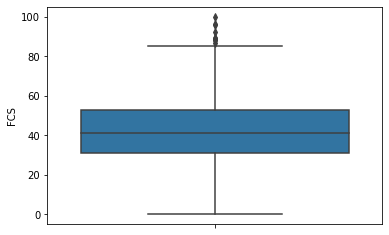

In [36]:
sns.boxplot(y='FCS',data=df)
plt.show()

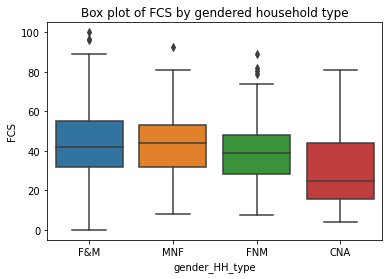

In [37]:
sns.boxplot(x='gender_HH_type',y='FCS',data=df)
plt.title('Box plot of FCS by gendered household type')
plt.show()



In [38]:
# computing the food consumption categories ( 0 = poor, 1 = Boder Line,  3 = Acceptable )
df['FCS_category'] = np.where(df['FCS'] < 21.5, 0,
                           np.where(df['FCS'] > 35, 2, 1))

In [39]:
# calculation of percentage  with poor FCS
poor_FCS = df ['FCS_category']. value_counts()[0]
num =  df.shape[0]

percentage = round((poor_FCS / num) * 100)
print (' The percentage of people with poor FCS is:',  percentage,'%')

 The percentage of people with poor FCS is: 13 %


In [40]:
# T-test for FCS on gendered household type

In [41]:
from scipy.stats import ttest_ind  # importing T-test from stats library 

In [42]:
# test between FM and MNF
TwoTail = ttest_ind(FM_df['FCS'],MNF_df['FCS'],equal_var = True)   
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=-0.009534352692401193, pvalue=0.9923959402678745) 
  Note: if p-value less than 0.05 then means are statistically different


In [43]:
# test between FM and MNF
TwoTail = ttest_ind(FM_df['FCS'],MNF_df['FCS'],equal_var = True)   
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=-0.009534352692401193, pvalue=0.9923959402678745) 
  Note: if p-value less than 0.05 then means are statistically different


In [44]:
# test between FNM and MNF
TwoTail = ttest_ind(MNF_df['FCS'],FNM_df['FCS'],equal_var = True)   
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=1.4788436803587695, pvalue=0.14058070785841228) 
  Note: if p-value less than 0.05 then means are statistically different


In [45]:
# test between FNM and CNA
TwoTail = ttest_ind(FNM_df['FCS'],CNA_df['FCS'],equal_var = True)   
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=3.1773499974248454, pvalue=0.0017059763603290547) 
  Note: if p-value less than 0.05 then means are statistically different


#### 3.a Food consumption score by gendered household type

## 4) Reduced Coping Strategy index

In [46]:
# checking the data type for coping strategy columns 
df[['CS01','CS02','CS03','CS04','CS05']].dtypes

CS01    object
CS02    object
CS03    object
CS04    object
CS05    object
dtype: object

In [47]:
# checking the number of missing value for food group consumption columns 
CS_missing = df[['CS01','CS02','CS03','CS04','CS05']].isna().sum()
print (CS_missing)

CS01    0
CS02    0
CS03    0
CS04    0
CS05    0
dtype: int64


In [48]:
# viewing  the different values in CSO1 and so on
print (df['CS01'].unique())
print (df['CS02'].unique())

['4 days' '0 day' '1 day' '2 days' '3 days' '5 days' '7 days' '6 days']
['2 days' '1 day' '0 day' '3 days' '4 days' '5 days' '6 days' '7 days']


In [49]:
# creating/renaming the coping strategy column and keeping the first value characters (ex: 2 days to 2)
df["c1"] = df ["CS01"].str[0]
df["c2"] = df ["CS02"].str[0]
df["c3"] = df ["CS03"].str[0]
df["c4"] = df ["CS04"].str[0]
df["c5"] = df ["CS05"].str[0]

In [50]:
# Transforming columns as integer data type
df["c1"] = df ["c1"].astype(int)
df["c2"] = df ["c2"].astype(int)
df["c3"] = df ["c3"].astype(int)
df["c4"] = df ["c4"].astype(int)
df["c5"] = df ["c5"].astype(int)

In [51]:
# Creating coping weighted colums
df["c1_w"] = df ["c1"]* 1
df["c2_w"] = df ["c2"]*2
df["c3_w"] = df ["c3"]*1
df["c4_w"] = df ["c4"]*3
df["c5_w"] = df ["c5"]*1

In [52]:
# Computing reduced coping strategy index
df["rcsi"] = df["c1_w"] + df["c2_w"] + df["c3_w"] + df["c4_w"] + df["c5_w"]

## 5) Income

In [53]:
# viewing  the different values regularly incomes 
print (df['regularly_income1'].unique())

['Monthly' 'Daily' 'Weekly' 'Seasonally' 'Quarterly']


In [54]:
# checking the number of missing value for earning_income1 columns 
earning_income1_missing = df[['earning_income1']].isna().sum()
print (earning_income1_missing)

earning_income1    0
dtype: int64


In [55]:
# Creation of a column for weekly income  
df['weekly_income'] = np.where((df['regularly_income1'] == 'Monthly') , df['earning_income1']/4,
                       np.where((df['regularly_income1'] == 'Daily') , df['earning_income1']*7,
                        np.where((df['regularly_income1'] == 'Seasonally') , df['earning_income1']/8,
                         np.where((df['regularly_income1'] == 'Seasonally') , df['earning_income1']/12,
                          df["earning_income1"]))))                             
                   

In [56]:
df['weekly_income_$'] = df['weekly_income'] / 3745

In [57]:
df['net_income'] = df['spend_food'] - df['spend_cooking'] - df['spend_energy_lighting?'] - df['spend_health'] - df['spend_education'] - df['spend_others']

In [58]:
df ['net_income_positive'] = np.where((df['net_income'] > 0) , 1, 0)

## 6) recomputing of age as numerical-categorical 


In [59]:
# viewing  the different values regularly incomes 
print (df['age'].unique())

['30-39 years' '50-59 years' '40-49 years' '18-29 years']


In [60]:
# checking the number of missing value for age columns 
age_missing = df[['age']].isna().sum()
print (age_missing)

age    0
dtype: int64


In [61]:
df['age1'] = np.where((df['age'] == '18-29 years') , 1,
                       np.where((df['age'] == '30-39 years') , 2,
                        np.where((df['age'] == '40-49 years') , 3, 4)))   
                                 

# II. Creation of  subsets of status 

In [62]:
# checking unique value for status
df['status'].unique()

array(['National (host)', 'Refugee'], dtype=object)

In [63]:
# Counting number of row by status
df['status'].value_counts()

Refugee            541
National (host)    283
Name: status, dtype: int64

In [64]:
refugee_df = df[df['status']== 'Refugee']  # creating a subset for "refugee" from "status" column (data mining)
host_df = df[df['status']== 'National (host)']  # creating a subset for "host" from "status" column (data mining)

In [97]:
path = "C:/Users/Nael/Desktop/Uganda/Uganda Uthabiti_baseline/ML"
refugee_df.to_csv('C:/Users/Nael/Desktop/Uganda/Uganda Uthabiti_baseline/ML/refugee_df.csv')
                 

In [66]:
# Checking exactitude of rows in dataset
print("Number of row in refugees subset is : ",refugee_df.shape[0], "and for host subset is ", host_df.shape[0])

Number of row in refugees subset is :  541 and for host subset is  283


# III. Refugees analysis and ML 

## 3.a Exploratory Data Analysis (EDA) for refugees

In [67]:
# descriptive statistics outcome indicators (rcis, fCS and income)
refugee_df[['FCS','rcsi','weekly_income_$','net_income']].describe()

,FCS,rcsi,weekly_income_$,net_income
count,541.000000,541.000000,541.000000,5.410000e+02
mean,39.213494,12.646950,265.555299,-1.097770e+05
std,17.242797,10.518024,966.365168,4.086766e+05
min,0.000000,0.000000,0.333778,-7.616000e+06
25%,27.000000,5.000000,16.688919,-1.150000e+05
50%,38.000000,10.000000,37.383178,-3.000000e+04
75%,48.500000,18.000000,186.915888,2.000000e+03
max,96.000000,56.000000,14018.691589,1.675000e+06


In [68]:
# calculation of percentage refugees with poor FCS
num_poor_FCS = refugee_df ['FCS_category']. value_counts()[0]
num_refugees =  refugee_df.shape[0]

percentage_poor = round((num_poor_FCS / num_refugees) * 100)
print (' The percentage of refugees with poor FCS is:',  percentage_poor,'%')

 The percentage of refugees with poor FCS is: 17 %


In [69]:
# calculation of percentage refugees with boderline FCS
num_border_FCS = refugee_df ['FCS_category']. value_counts()[1]

percentage_border = round((num_border_FCS / num_refugees) * 100)
print (' The percentage of refugees with borderline FCS is:',  percentage_border,'%')

 The percentage of refugees with borderline FCS is: 25 %


In [70]:
# calculation of mean rCSI for refugees 
refugees_rcsi = round(refugee_df['rcsi']. mean(),1)
print('Reduced coping strategy index for refugee is: ',refugees_rcsi)

Reduced coping strategy index for refugee is:  12.6


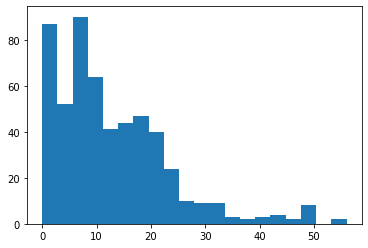

In [71]:
# distribution of refugee rCSI
plt.hist(refugee_df['rcsi'],bins =20)
plt.show()

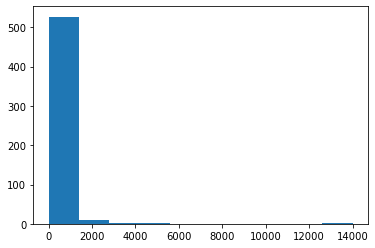

In [72]:
# distribution of refugee  weekly income
plt.hist(refugee_df['weekly_income_$'])
plt.show()

In [73]:

refugee_df['net_income_positive'].value_counts()

0    387
1    154
Name: net_income_positive, dtype: int64

In [74]:
# Correlation between outcome indicators and demographic variable (Age respondent, HH size)
  

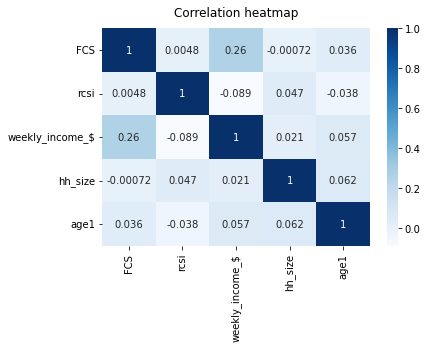

In [75]:
heatmap= sns.heatmap(refugee_df[['FCS','rcsi','weekly_income_$','hh_size', 'age1']].corr(),cmap = 'Blues', annot = True)  
heatmap.set_title('Correlation heatmap', pad =12)
plt.show()

In [76]:
FM = refugee_df[refugee_df['gender_HH_type'] == 'F&M']
mean_rcsi_FM = FM['rcsi'].mean()
mean_rcsi_FM

12.187301587301587

## 3.b Clustering analysis for refugees 

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [78]:
# checking one more time for no missing value
checking_missing = refugee_df[['FCS','rcsi','age1','hh_size']].isna().sum()
print (checking_missing)

FCS        0
rcsi       0
age1       0
hh_size    0
dtype: int64


### Features engineering for refugees attributes

In [79]:
# Selecting features and converting into numpy array

#x = np.asarray(refugee_df[['FCS_category','rcsi','age1','hh_size']]) 
x = np.asarray(refugee_df[['FCS','rcsi']])

In [80]:
scaler = StandardScaler()

In [81]:
x = scaler.fit(x).transform(x) # normalizing

In [82]:
x[0:2] # checking normalization for the firt two rows is done

array([[-0.21556423,  0.69973744],
       [ 0.04565584,  1.08038897]])

### Computing inertia and determination of  optimum number of clusters

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

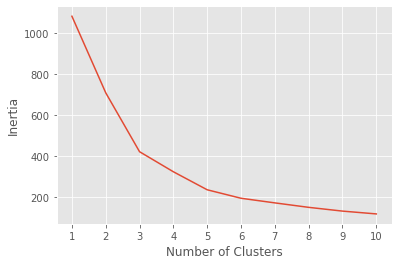

In [83]:
# Creating a variable which is an empty list that store the inertia for each K 

inertia = []

#  for loop 

for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    cluster = KMeans (n_clusters = a)  #  instance of K-Means
    cluster.fit(x)                     #  Fitting the instance of K-Means to selected features
    inertia.append (cluster.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10

k = list(range(1,11))

# Plotting number of clusters and the computed inertias

plt.style.use("ggplot")
plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
sns.lineplot(x = k , y =inertia)
plt.show()     

In [84]:
# printing the list of inertia values 

print (inertia)

[1082.0, 709.2201028303734, 422.36979649201044, 324.7659935539539, 237.05230297814296, 195.7803005362021, 173.26111378058036, 151.51707428107093, 133.22558891919763, 119.52584499005285]


In [85]:
# locating the elbow point

from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

opt = kl.elbow

print('The optimun number of cluster is' , opt)

The optimun number of cluster is 3


### K-Means with the optimum number of K and assigning each data point to a cluster for refugees

In [86]:
# K-Means with optimun K 

clustering = KMeans (n_clusters = opt)
clustering.fit(x)

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [87]:
# assigning  each data point (row) to a cluster

refugee_df['cluster'] = clustering.labels_


C:\Users\Nael\AppData\Local\Temp/ipykernel_22708/2073212038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refugee_df['cluster'] = clustering.labels_


### Getting basic statisctic descriptive for the features in each cluster

In [88]:
refugee_df1 = refugee_df[['FCS','rcsi','age1','hh_size','cluster']]
refugee_df1.head()

,FCS,rcsi,age1,hh_size,cluster
11,35.5,20,1,5,0
12,40.0,24,2,8,0
13,45.5,30,2,8,0
15,52.0,19,2,8,0
16,44.5,19,2,5,0


In [89]:
#  getting means value of each feature and for each cluster
refugee_df1.groupby('cluster').mean()

,FCS,rcsi,age1,hh_size
cluster,,,,
0,40.732558,26.945736,2.100775,6.666667
1,27.011321,8.449057,2.162264,5.969811
2,59.877551,7.666667,2.238095,6.027211


In [90]:
#  getting maximum value of each feature and  for each cluster
refugee_df1.groupby('cluster').max()

,FCS,rcsi,age1,hh_size
cluster,,,,
0,64.5,56,4,38
1,43.0,23,4,32
2,96.0,26,4,40


In [91]:
#  getting minimum value of each feature and for each cluster
refugee_df1.groupby('cluster').min()

,FCS,rcsi,age1,hh_size
cluster,,,,
0,11.0,16,1,1
1,0.0,0,1,0
2,44.0,0,1,0


In [92]:
# getting the coordinate of centroids
c = clustering.cluster_centers_
# Reverse the normalization process to obtain the original cluster centers
c1 = scaler.inverse_transform(c)
c1

array([[40.73255814, 26.94573643],
       [27.01132075,  8.4490566 ],
       [59.87755102,  7.66666667]])

In [93]:
# Accessing each centroid coordinate value for later use them for visualization 


In [94]:
cx1 = c1[0,1]
cy1 = c1[0,0]
cx2 = c1[1,1]
cy2 = c1[1,0]
cz1 = c1[2,1]
cz2 = c1[2,0]

### Vizualizing the scatterplots and the clusters (only for selection of two features)

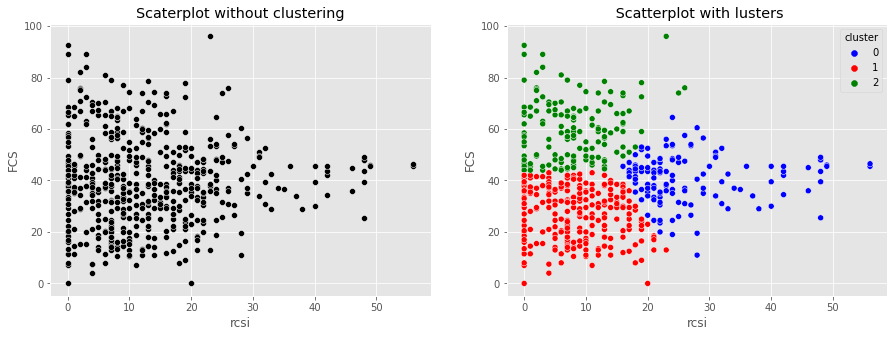

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=refugee_df1, x='rcsi', y='FCS',color = 'black').set_title('Scaterplot without clustering')

custom_palette = {0: "blue", 1: "red", 2:"green"}
sns.scatterplot(ax=axes[1], data=refugee_df1, x='rcsi', y='FCS',hue='cluster',palette=custom_palette).set_title(" Scatterplot with lusters")

# Display the plothow
plt.show()